# INFOB2DA PA3 | Rijk's drafts


In [146]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import numpy as np
print("Importing libraries succesful")


Importing libraries succesful


In [68]:
df = pd.read_csv("online_shoppers_intention 1.csv")
df.head(10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


We are comparing the Operating System 13 with the rest of the customers. First, we select the columns that best define 
1 A customer's behavior on certain pages
2 A customer's behavior switching pager
3 If a customer generates revenue

We will apply fitting summary statistics and visualize the results in a way that makes comparison easy.

In [69]:
properties = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration",
              "BounceRates", "ExitRates", "Revenue"]

df_13 = df[properties][df["Browser"] == 13]
df_13.head(10)


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,Revenue
5679,0.000000,225.766667,9630.209524,0.053355,0.066159,False
8003,77.333333,7.000000,1051.291667,0.000000,0.014815,False
8006,446.250000,0.000000,815.250000,0.000000,0.002500,False
8115,0.000000,0.000000,87.000000,0.000000,0.028571,False
8187,0.000000,0.000000,129.500000,0.000000,0.050000,False
8299,0.000000,0.000000,222.000000,0.000000,0.040000,True
8328,60.500000,0.000000,50.000000,0.000000,0.025000,True
8368,1652.000000,0.000000,446.375000,0.000000,0.005882,False
8467,61.000000,31.000000,43.000000,0.000000,0.025000,False
8635,0.000000,0.000000,784.883333,0.000000,0.004762,True


In [70]:
rows = df_13.shape[0]
columns = df_13.shape[1]

print(f"The dataframe above has\n\n{rows} rows\n{columns} columns")

The dataframe above has

61 rows
6 columns


In [71]:
df_13.replace(0, np.nan, inplace=True)
df_13.head(10)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,Revenue
5679,NaN,225.766667,9630.209524,0.053355,0.066159,False
8003,77.333333,7.000000,1051.291667,NaN,0.014815,False
8006,446.250000,NaN,815.250000,NaN,0.002500,False
8115,NaN,NaN,87.000000,NaN,0.028571,False
8187,NaN,NaN,129.500000,NaN,0.050000,False
8299,NaN,NaN,222.000000,NaN,0.040000,True
8328,60.500000,NaN,50.000000,NaN,0.025000,True
8368,1652.000000,NaN,446.375000,NaN,0.005882,False
8467,61.000000,31.000000,43.000000,NaN,0.025000,False
8635,NaN,NaN,784.883333,NaN,0.004762,True


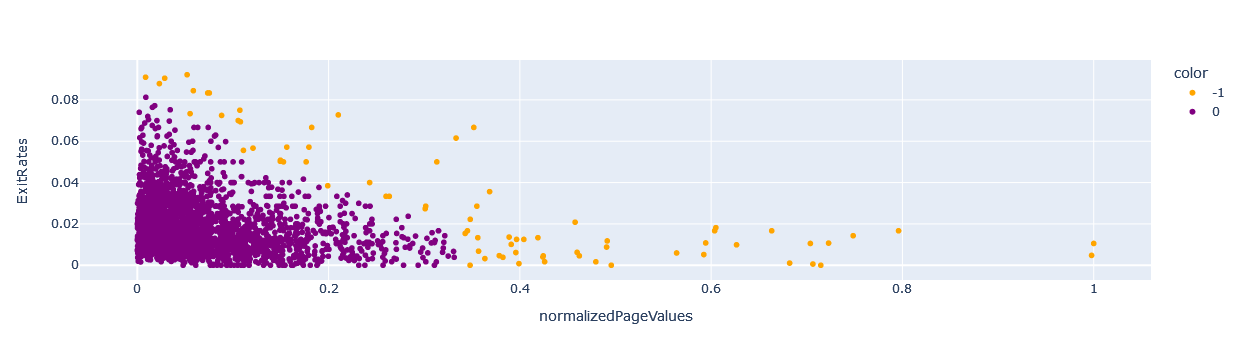

DBI score: 0.761093645569819


In [147]:
df = df.drop(df[df["PageValues"] <= 0].index)
df["normalizedPageValues"] = (df["PageValues"] - df["PageValues"].min()) / (df["PageValues"].max() - df["PageValues"].min())

X = df[["normalizedPageValues", "ExitRates"]]

db = DBSCAN(eps=0.01, min_samples=6)
labels = db.fit_predict(X)

labels = labels.astype(str)
fig = px.scatter(df, x="normalizedPageValues", y="ExitRates", color=labels, 
                 color_discrete_map={"0": "purple", "-1": "orange"}
                )
fig.show()

dbi = davies_bouldin_score(X, labels)
print(f"DBI score: {dbi}")